In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from itertools import combinations

sns.set(style="whitegrid")

spotify_data = pd.read_csv("data.csv")
spotify_data.artists = spotify_data.artists.apply(lambda artist: ast.literal_eval(artist))
spotify_data.drop(columns = ["id", "release_date"], inplace = True)
spotify_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.995,[Carl Woitschach],0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.994,"[Robert Schumann, Vladimir Horowitz]",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.604,[Seweryn Goszczyński],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.995,[Francisco Canaro],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.990,"[Frédéric Chopin, Vladimir Horowitz]",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928


In [ ]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   instrumentalness  169909 non-null  float64
 7   key               169909 non-null  int64  
 8   liveness          169909 non-null  float64
 9   loudness          169909 non-null  float64
 10  mode              169909 non-null  int64  
 11  name              169909 non-null  object 
 12  popularity        169909 non-null  int64  
 13  speechiness       169909 non-null  float64
 14  tempo             169909 non-null  float64
 15  valence           169909 non-null  float64
 16  year              16

In [ ]:
spotify_data.iloc[:, 0:8].describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000


In [ ]:
spotify_data.iloc[:, 8:].describe()

,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


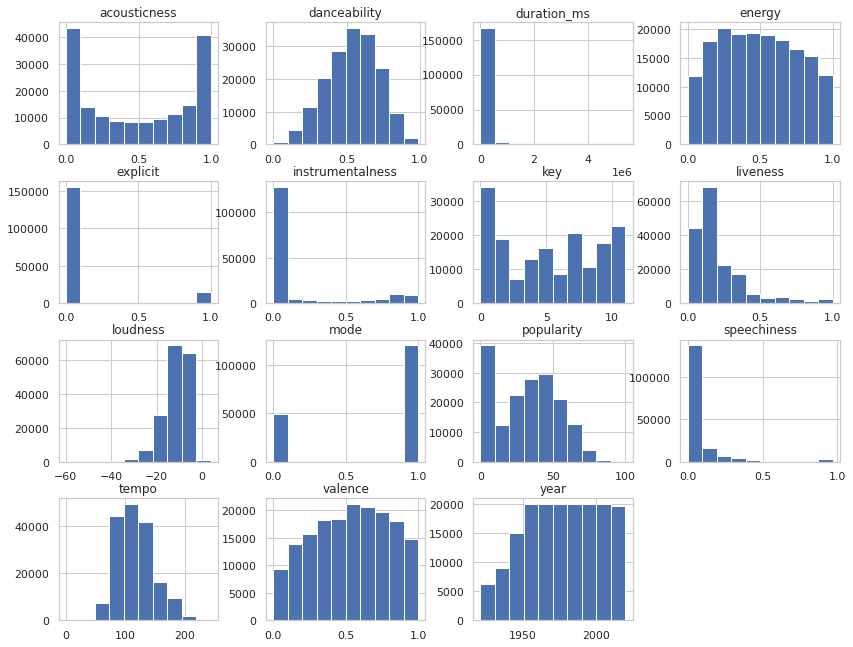

In [ ]:
spotify_data.hist(figsize=(14, 11))
plt.show()

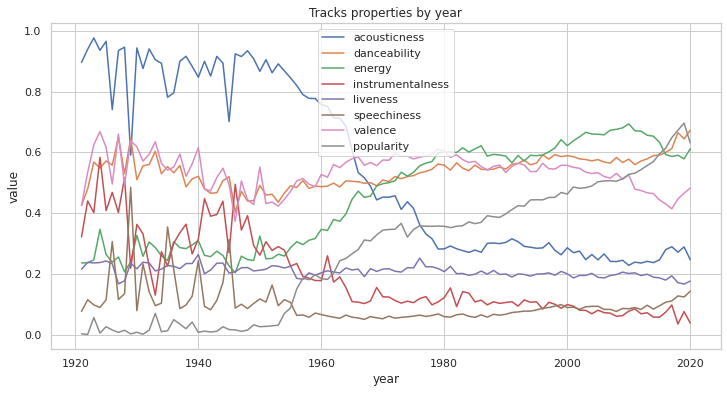

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
grouped_by_year = spotify_data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness'
                             , 'speechiness', 'valence', 'popularity', 'year']].groupby("year").mean()         
grouped_by_year.popularity = grouped_by_year.popularity/100
grouped_by_year.plot(ax = ax)
ax.legend(loc = "best")
plt.title("Tracks properties by year")
plt.ylabel("value")
plt.show()

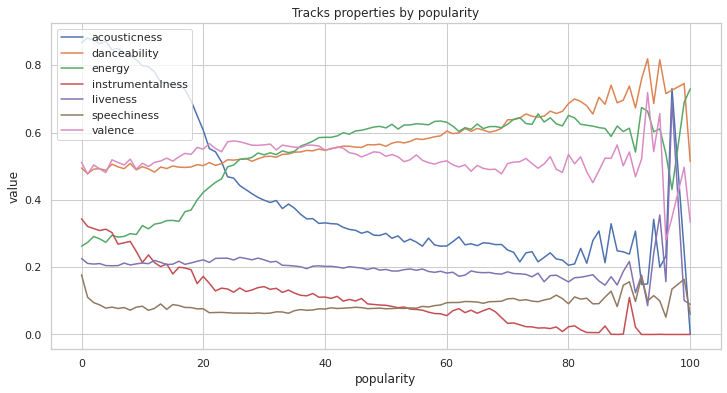

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
grouped_by_year = spotify_data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness'
                             , 'speechiness', 'valence', 'popularity']].groupby("popularity").mean()         
grouped_by_year.plot(ax = ax)
ax.legend(loc = "best")
plt.title("Tracks properties by popularity")
plt.ylabel("value")
plt.show()

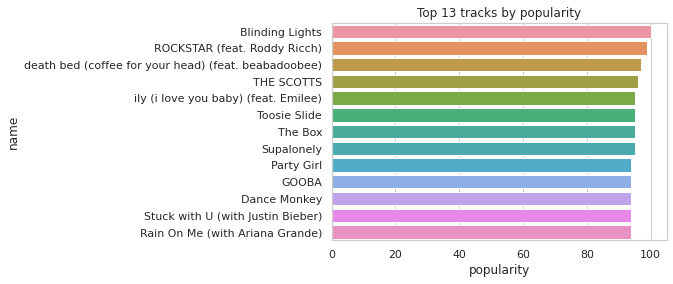

In [ ]:
top_13 = spotify_data.sort_values(by = "popularity", ascending=False).iloc[0:13, [11,12]]
sns.barplot(x = "popularity", y = "name", data = top_13)
plt.title("Top 13 tracks by popularity")
plt.show()

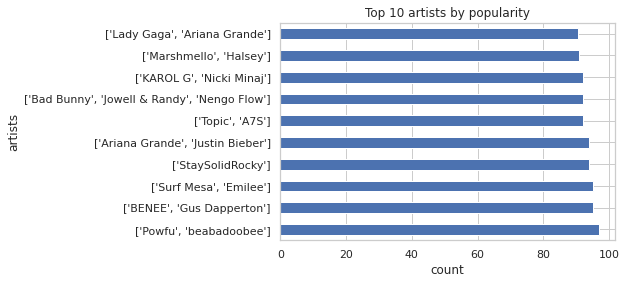

In [ ]:
artists_popularity = spotify_data[["artists", "popularity"]].copy()
artists_popularity.artists = artists_popularity.artists.astype(str)
artists_grouped_by_popularity = artists_popularity.groupby("artists").mean().sort_values(by = "popularity", ascending = False)[0:10]
artists_grouped_by_popularity.plot(kind = "barh", legend = False)
plt.xlabel("count")
plt.title("Top 10 artists by popularity")
plt.show()

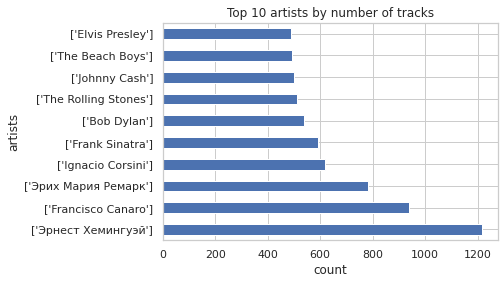

In [ ]:
artists_popularity = spotify_data[["artists", "popularity"]].copy()
artists_popularity.artists = artists_popularity.artists.astype(str)
artists_count = artists_popularity.groupby("artists").count().sort_values(by = "popularity", ascending = False)[0:10]
artists_count.rename(columns = {"popularity": "count"}, inplace = True)
artists_count.plot(kind = "barh", legend = False)
plt.xlabel("count")
plt.title("Top 10 artists by number of tracks")
plt.show()

In [ ]:
artists_network = []
for index, row in spotify_data.iterrows():
  if (len(row['artists']) > 1):
    artists_group = list(combinations(row['artists'], 2))
    for artists in artists_group:
      list_of_artists = list(artists)
      list_of_artists.append(row['popularity'])
      artists_network.append(list_of_artists)

artists_network = pd.DataFrame(artists_network, columns = ["from", "to", "weight"]) 
artists_network = artists_network.groupby(["from", "to"]).mean() 
artists_network.reset_index(inplace=True)

graph = nx.from_pandas_edgelist(artists_network, source="from", target="to", edge_attr=["weight"])

for artist in artists_network["from"]:
  nx.set_node_attributes(graph, {artist: {"weight": artists_network.loc[artists_network["from"] == artist, "weight"].mean()}})

nx.write_graphml(graph, "/spotify.graphml")  